In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Laboratorio 1
## Grupo Laboratorio N°1
## Grupo 5
- Gutierrez Coronado Matias Ezequiel
- Flores Medina Erik Daniel
- Marin Masti Gustavo (oyente)
- Montaño Pacaja Leonardo Miguel (oyente)
- Monzón Bruno Antonio (oyente)
- Saygua Romero Josue (oyente)

# 1. Metodo del gradiente

## 1.1 Importación de Librerías para Análisis y Visualización

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
#from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Permite que las gráficas de Matplotlib se muestren dentro del cuaderno de Jupyter
%matplotlib inline


## 1.2 Carga de Datos desde un Archivo CSV

In [ ]:
dataset_path = "/content/drive/MyDrive/Inteligencia Artificial/Datasets/nba.csv"
data = pd.read_csv(dataset_path)
print(data.shape[0])

12844


## 1.3 Selección y Visualización de Características del Conjunto de Datos

In [ ]:
X = data[["age", "player_height", "player_weight", "gp", "net_rating",
          "oreb_pct", "usg_pct", "ts_pct", "ast_pct"]].values  # Convertir a numpy
y = data["pts"].values
m = y.size

# Imprimir algunos puntos de datos para inspección
print(f"Número de ejemplos de entrenamiento: {m}")
print('{:>8s}{:>10s}{:>10s}{:>8s}{:>12s}{:>12s}{:>12s}{:>12s}{:>12s}{:>10s}'.format(
    'Edad', 'Altura', 'Peso', 'PJ', 'Net_Rating', 'Oreb_Pct', 'Usg_Pct', 'TS_Pct', 'Ast_Pct', 'Puntos'))
print('-' * 100)

# Mostrar hasta 10 ejemplos del conjunto de datos
for i in range(min(10, m)):
    print('{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:12.2f}{:12.2f}{:12.2f}{:12.2f}{:12.2f}{:10.2f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], y[i]
    ))


Número de ejemplos de entrenamiento: 12844
    Edad    Altura      Peso      PJ  Net_Rating    Oreb_Pct     Usg_Pct      TS_Pct     Ast_Pct    Puntos
----------------------------------------------------------------------------------------------------
      22       193        95      64        0.30        0.04        0.17        0.49        0.25      3.90
      28       190        86       4        8.90        0.03        0.17        0.50        0.04      3.80
      26       203       103      41       -8.20        0.11        0.17        0.51        0.12      8.30
      30       203       102      64       -2.70        0.03        0.21        0.53        0.12     10.20
      23       213       120      52      -14.10        0.10        0.20        0.50        0.06      2.80
      33       198       102      80       -5.80        0.03        0.20        0.50        0.14     10.60
      26       231       137      73        6.90        0.10        0.18        0.62        0.02     10.60


## 1.4 Normalización de Características

In [ ]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


## 1.5 Aplicación de la Normalización de Características

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

for i in range(min(10, m)):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8]
    ))
print('-------------------------------------------------------------------------------------------------------')
print('media de cada columna')
print('{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(*mu))
print('desviacion estandar de cada columna')
print('{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(*sigma))
print('-------------------------------------------------------------------------------------------------------')
for i in range(min(10, m)):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8]
    ))

      22     193      95      64      0.30      0.04      0.17      0.49      0.25
      28     190      86       4      8.90      0.03      0.17      0.50      0.04
      26     203     103      41     -8.20      0.11      0.17      0.51      0.12
      30     203     102      64     -2.70      0.03      0.21      0.53      0.12
      23     213     120      52    -14.10      0.10      0.20      0.50      0.06
      33     198     102      80     -5.80      0.03      0.20      0.50      0.14
      26     231     137      73      6.90      0.10      0.18      0.62      0.02
      30     203     100      79      3.20      0.03      0.27      0.60      0.09
      24     201     107      80     -2.90      0.05      0.28      0.53      0.15
      24     203     102      80      6.90      0.05      0.28      0.56      0.36
-------------------------------------------------------------------------------------------------------
media de cada columna
   27.05  200.56  100.26   51.15     -2.23  

## 1.6 Adición del Término de Intersección

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
for i in range(min(10, m)):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], X[i, 9]
    ))

       1      -1      -1      -0      0.51      0.20     -0.28     -0.29     -0.26      1.24
       1       0      -1      -1     -1.88      0.88     -0.56     -0.20     -0.16     -0.94
       1      -0       0       0     -0.40     -0.47      1.20     -0.18     -0.01     -0.07
       1       1       0       0      0.51     -0.04     -0.62      0.40      0.14     -0.07
       1      -1       1       2      0.03     -0.94      1.11      0.19     -0.13     -0.72
       1       1      -0       0      1.15     -0.28     -0.53      0.34     -0.10      0.12
       1      -0       3       3      0.87      0.72      1.01      0.01      1.03     -1.14
       1       1       0      -0      1.11      0.43     -0.67      1.63      0.90     -0.46
       1      -1       0       1      1.15     -0.05     -0.07      1.74      0.15      0.15
       1      -1       0       0      1.15      0.72     -0.12      1.84      0.42      2.38


## 1.7 Cálculo de la Función de Costo para Múltiples Variables

In [ ]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot (X,theta) - y))

    return J


## 1.8 Implementación del Descenso por el Gradiente para Múltiples Variables

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

## 1.9 Ejecución del Descenso por Gradiente y Predicción

Theta calculado por el descenso por gradiente: [ 7.53929469  0.0838181   0.34021272  0.34696249  2.07535864  0.38851946
 -0.44452591  2.91707135  1.01414193  0.92781903]
Puntos esperados para el jugador ingresado: 15.99


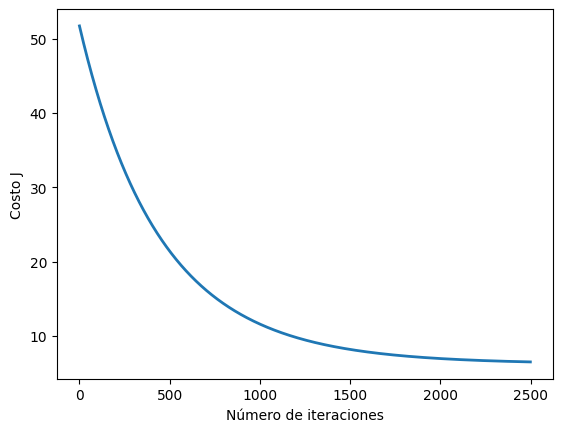

In [ ]:
# Definir la tasa de aprendizaje y el número de iteraciones para el descenso por gradiente
alpha = 0.001
num_iters = 2500
theta = np.zeros(X.shape[1])

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Graficar la convergencia del costo durante las iteraciones
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

# Imprimir los valores óptimos de theta encontrados
print('Theta calculado por el descenso por gradiente:', theta)

X_array = np.array([1, 34.0, 190.5, 82.0, 70, 5.1, 0.030, 0.250, 0.590, 0.420])
X_array[1:] = (X_array[1:] - mu) / sigma
prediccion_pts = np.dot(X_array, theta)

# Mostrar la predicción de puntos para el jugador ingresado
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))
#print('{:8.2f}{:8.2f}{:8.2f}{:8.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(*prediccion_pts))


## 1.10 Predicción de Puntos para un Jugador Específico

In [ ]:
# Estimar los puntos esperados para un jugador de 25 años, 198 cm de altura, 95 kg de peso,
# 65 partidos jugados, net rating de 5.4, 9.3% de rebotes ofensivos, 23.5% de uso,
# 58.1% de true shooting y 18.2% de asistencias.
X_array = np.array([1,25, 198, 95, 65, 5.4, 0.093, 0.235, 0.581, 0.182])
X_array[1:] = (X_array[1:] - mu) / sigma
prediccion_pts = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))

Puntos esperados para el jugador ingresado: 12.15


In [ ]:
# Estimar los puntos esperados para un jugador de 24 años, 192 cm de altura, 88 kg de peso,
# 60 partidos jugados, net rating de 2.9, 8.1% de rebotes ofensivos, 20.5% de uso,
# 54.3% de true shooting y 14.8% de asistencias.
X_array = np.array([1,24, 192, 88, 60, 2.9, 0.081, 0.205, 0.543, 0.148])
X_array[1:] = (X_array[1:] - mu) / sigma
prediccion_pts = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))

Puntos esperados para el jugador ingresado: 9.00


In [ ]:
# Estimar los puntos esperados para un jugador de 32 años, 206 cm de altura, 102 kg de peso,
# 80 partidos jugados, net rating de 4.8, 10.2% de rebotes ofensivos, 21.7% de uso,
# 57.8% de true shooting y 17.9% de asistencias.
X_array = np.array([1,32, 206, 102, 80, 4.8, 0.102, 0.217, 0.578, 0.179])
X_array[1:] = (X_array[1:] - mu) / sigma
prediccion_pts = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))

Puntos esperados para el jugador ingresado: 12.87


## 1.11 Evaluación del Modelo de Regresión: Análisis de Errores

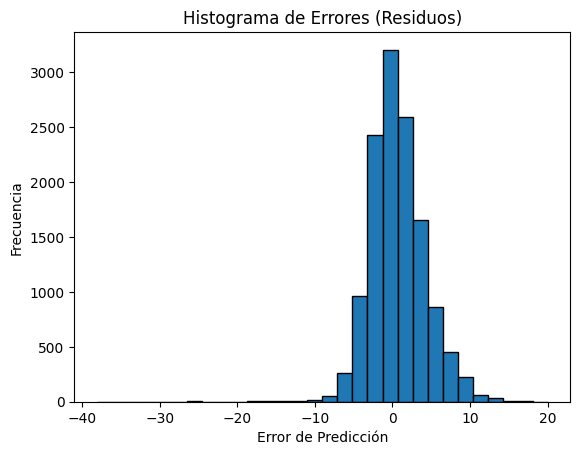

In [ ]:
import matplotlib.pyplot as plt

y_pred = np.dot(X, theta)
# Graficar el histograma de los errores de predicción para analizar la distribución de los residuos
errores = y - y_pred
plt.hist(errores, bins=30, edgecolor='black')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores (Residuos)')
plt.show()
print()

In [ ]:
from sklearn.metrics import mean_absolute_error

max_puntos = data["pts"].max()

# Calcula el Error Absoluto Medio (MAE), que mide la magnitud promedio de los errores entre los valores reales (y) y los predichos (y_pred),
# sin tener en cuenta la dirección del error (es decir, sin importar si la predicción fue mayor o menor que el valor real).
mae = mean_absolute_error(y, y_pred)
precision = 100 - ((mae / max_puntos) * 100)

print("Máximo de puntos anotados por un jugador:", max_puntos)
print("Error Absoluto Medio (MAE):", mae)
print("La presicion:", precision,"%")

Máximo de puntos anotados por un jugador: 36.1
Error Absoluto Medio (MAE): 2.6964724386948453
La presicion: 92.53054726123311 %


# 2. Metodo de Ecuacion de la Normal


## 2.1 Ecuación de la Normal

In [ ]:
# Leer el archivo CSV
# dataset_path = "nba.csv"
data = pd.read_csv(dataset_path)

# Seleccionar características y convertir a numpy
X = data[["age", "player_height", "player_weight", "gp", "net_rating",
          "oreb_pct", "usg_pct", "ts_pct", "ast_pct"]].values  # Convertir a numpy
y = data["pts"].values  # Variable objetivo (puntos anotados)
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

## 2.2 Función para Calcular los Parámetros de Regresión Lineal Usando la Ecuación Normal

In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

## 2.3  Predicción de Puntos para un Jugador Específico

In [ ]:
# Calcular los parámetros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Datos de ejemplo: Estimar los puntos de un jugador con características específicas
X_array = np.array([1,34.0, 190.5, 82.0, 70, 5.1, 0.030, 0.250, 0.590, 0.420])

puntos = np.dot(X_array, theta)

print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(puntos))


Theta calculado a partir de la ecuación de la normal: [-2.76604239e+01  3.27839682e-02  6.22414094e-02  2.19282457e-02
  8.78476362e-02  2.75448800e-02 -1.40890397e+01  5.90991114e+01
  8.85808608e+00  8.94246536e+00]
Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 16.73


In [ ]:
# Estimar los puntos esperados para un jugador de 25 años, 198 cm de altura, 95 kg de peso,
# 65 partidos jugados, net rating de 5.4, 9.3% de rebotes ofensivos, 23.5% de uso,
# 58.1% de true shooting y 18.2% de asistencias.
X_array = [1,25, 198, 95, 65, 5.4, 0.093, 0.235, 0.581, 0.182]
price = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(price))

Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 12.78


In [ ]:
# Estimar los puntos esperados para un jugador de 24 años, 192 cm de altura, 88 kg de peso,
# 60 partidos jugados, net rating de 2.9, 8.1% de rebotes ofensivos, 20.5% de uso,
# 54.3% de true shooting y 14.8% de asistencias.
X_array = [1,24, 192, 88, 60, 2.9, 0.081, 0.205, 0.543, 0.148]
price = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(price))

Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 9.46


In [ ]:
# Estimar los puntos esperados para un jugador de 32 años, 206 cm de altura, 102 kg de peso,
# 80 partidos jugados, net rating de 4.8, 10.2% de rebotes ofensivos, 21.7% de uso,
# 57.8% de true shooting y 17.9% de asistencias.
X_array = [1,32, 206, 102, 80, 4.8, 0.102, 0.217, 0.578, 0.179]
price = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(price))

Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 13.72


## 2.4 Presicion por la utilizacion de la ecuacion de la normal

In [ ]:
y_pred_N = np.dot(X, theta)
mae = mean_absolute_error(y, y_pred_N)
precision_N = 100 - ((mae / max_puntos) * 100)

print("Máximo de puntos anotados por un jugador:", max_puntos)
print("Error Absoluto Medio (MAE):", mae)
print("La presicion:", precision_N,"%")

Máximo de puntos anotados por un jugador: 36.1
Error Absoluto Medio (MAE): 2.6776204225991225
La presicion: 92.5827689124678 %
